In [1]:
import sys
sys.path.append('C://Users//User//PycharmProjects//Musgrave_scripts//BenRich//common_funcs//')
import jdftxfuncs as jfunc
# import cohpfuncs as cfunc
# import plotfuncs as pfunc
import numpy as np
import matplotlib.pyplot as plt
base_dir = "D://data//aziz//BEAST//"
biases = ["-1.00V", "-0.50V", "0.00V"]
fermis = [-0.1345, -0.1529, -0.1713]
coordination = ["MN1C", "MN2C", "MN3C", "MN4C"]
geometry = ["pyridinic", "pyrrolic"]
surfs = [
    ["Sc", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn"],
    ["Y", "Zr", "Nb", "Mo", "Tc", "Ru", "Rh", "Pd", "Ag", "Cd"],
    ["skip", "Hf", "Ta", "W", "Re", "Os", "Ir", "Pt", "Au", "Hg"]
]
H3O_Gs = [-16.6288268005513586, -16.4816267761344832, -16.3344267760943431]
H2O_Gs = [-16.2050096897029619, -16.0578096897026263, -15.9106096897035307]
ads_types = [False, True]
save_dir = "C://Users//User//PycharmProjects//Musgrave_scripts//BenRich//aziz_data_parse//beast_analysis//plots//3"
from scipy.stats import linregress

In [2]:
def get_dir(coord_idx, geom_idx, row_idx, col_idx, bias_idx, ads_bool):
    out_str = coordination[coord_idx] + "//" + geometry[geom_idx] + "//backup//"
    if ads_bool:
        out_str += "adsorbed" + "//" + surfs[row_idx][col_idx] + "//" + "H" + "//" + biases[bias_idx] + "//01//"
    else:
        out_str += "surfs" + "//" + surfs[row_idx][col_idx] + "//" + biases[bias_idx] + "//"
    return base_dir + out_str

def get_G_line(dir):
    fname = dir + "Ecomponents"
    for line in open(fname):
        if "G" in line:
            return line
def get_G_val(line):
    return float(line.rstrip('\n').split("=")[1].lstrip(' '))

def get_G(coord_idx, geom_idx, row_idx, col_idx, bias_idx, ads_bool):
    dir = get_dir(coord_idx, geom_idx, row_idx, col_idx, bias_idx, ads_bool)
    return get_G_val(get_G_line(dir))

def get_dG(coord_idx, geom_idx, row_idx, col_idx, bias_idx):
    adsG = get_G(coord_idx, geom_idx, row_idx, col_idx, bias_idx, True) + H2O_Gs[bias_idx]
    bareG = get_G(coord_idx, geom_idx, row_idx, col_idx, bias_idx, False) + H3O_Gs[bias_idx]
    return adsG - bareG

def get_tm_info_lines(coord_idx, geom_idx, row_idx, col_idx, bias_idx, ads_bool):
    dir = get_dir(coord_idx, geom_idx, row_idx, col_idx, bias_idx, ads_bool)
    atom = surfs[row_idx][col_idx]
    fname = dir + "tinyout"
    for line in open(fname):
        if ("magnetic-moments " + atom) in line:
            give_mag = line
        if ("oxidation-state " + atom) in line:
            give_ox = line
    return give_mag, give_ox

def get_tm_info(coord_idx, geom_idx, row_idx, col_idx, bias_idx, ads_bool):
    lines = get_tm_info_lines(coord_idx, geom_idx, row_idx, col_idx, bias_idx, ads_bool)
    mag = float(lines[0].rstrip('\n').split(' ')[-1])
    ox = float(lines[1].rstrip('\n').split(' ')[-1])
    return mag, ox

In [3]:
oxs = []
mags = []
for i_coord in range(4):
    oxs.append([])
    mags.append([])
    for i_geom in range(2):
        oxs[-1].append([])
        mags[-1].append([])
        for i_row in range(3):
            oxs[-1][-1].append([])
            mags[-1][-1].append([])
            for i_col in range(len(surfs[0])):
                oxs[-1][-1][-1].append([])
                mags[-1][-1][-1].append([])
                if not ((i_col == 0) and (i_row == 2)):
                    for i_bias in range(3):
                        oxs[-1][-1][-1][-1].append([])
                        mags[-1][-1][-1][-1].append([])
                        for i_ads in range(2):
                            mag, ox = get_tm_info(i_coord, i_geom, i_row, i_col, i_bias, i_ads)
                            oxs[-1][-1][-1][-1][-1].append(ox)
                            mags[-1][-1][-1][-1][-1].append(mag)
                else:
                    for i_bias in range(3):
                        oxs[-1][-1][-1][-1].append([])
                        mags[-1][-1][-1][-1].append([])
                        for i_ads in range(2):
                            oxs[-1][-1][-1][-1][-1].append(np.nan)
                            mags[-1][-1][-1][-1][-1].append(np.nan)
                        oxs[-1][-1][-1][-1][-1] = np.array(oxs[-1][-1][-1][-1][-1])
                        mags[-1][-1][-1][-1][-1] = np.array(mags[-1][-1][-1][-1][-1])
                oxs[-1][-1][-1][-1] = np.array(oxs[-1][-1][-1][-1])
                mags[-1][-1][-1][-1] = np.array(mags[-1][-1][-1][-1])
            oxs[-1][-1][-1] = np.array(oxs[-1][-1][-1])
            mags[-1][-1][-1] = np.array(mags[-1][-1][-1])
        oxs[-1][-1] = np.array(oxs[-1][-1])
        mags[-1][-1] = np.array(mags[-1][-1])
    oxs[-1] = np.array(oxs[-1])
    mags[-1] = np.array(mags[-1])
oxs = np.array(oxs)
mags = np.array(mags)
oxs[0][1][1][8][0][1] = np.nan
mags[0][1][1][8][0][1] = np.nan

In [27]:
dGs = []
for i_coord in range(4):
    dGs.append([])
    for i_geom in range(2):
        dGs[-1].append([])
        for i_row in range(3):
            dGs[-1][-1].append([])
            for i_col in range(len(surfs[0])):
                dGs[-1][-1][-1].append([])
                if not ((i_col == 0) and (i_row == 2)):
                    for i_bias in range(3):
                        try:
                            dG = get_dG(i_coord, i_geom, i_row, i_col, i_bias)
                        except:
                            print("No such dir " + get_dir(i_coord, i_geom, i_row, i_col, i_bias, True))
                            # dG = 0.0
                            dG = np.nan
                        dGs[-1][-1][-1][-1].append(dG)
                else:
                    for i_bias in range(3):
                        dGs[-1][-1][-1][-1].append(np.nan)
                dGs[-1][-1][-1][-1] = np.array(dGs[-1][-1][-1][-1])
            dGs[-1][-1][-1] = np.array(dGs[-1][-1][-1])
        dGs[-1][-1] = np.array(dGs[-1][-1])
    dGs[-1] = np.array(dGs[-1])
dGs = np.array(dGs)
dGs[0][1][1][8] = np.array([np.nan, np.nan, np.nan])

In [28]:
mags_nads = abs(mags[:,:,:,:,:,0])
mags_ads = abs(mags[:,:,:,:,:,1])
dGs_flat = dGs.flatten()
mags_nads_flat = mags_nads.flatten()
mags_ads_flat = mags_ads.flatten()
dmags_flat = abs(mags_ads_flat - mags_nads_flat)

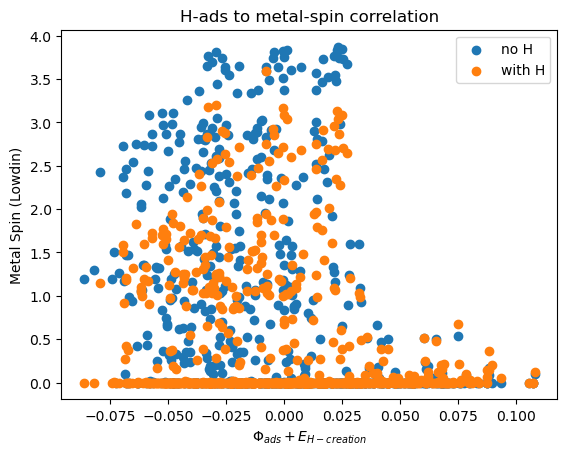

In [29]:
plt.scatter(dGs_flat, mags_nads_flat, label = 'no H')
plt.scatter(dGs_flat, mags_ads_flat, label = 'with H')
plt.ylabel('Metal Spin (Lowdin)')
plt.xlabel(r'$\Phi_{ads}+E_{H-creation}$')
plt.title('H-ads to metal-spin correlation')
plt.legend()
plt.savefig(save_dir + 'spin_ads_corr.png')

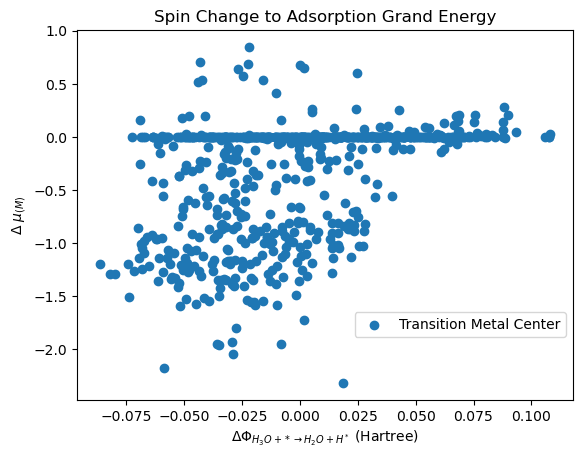

In [30]:
dmags_flat = mags_ads_flat - mags_nads_flat
plt.scatter(dGs_flat, dmags_flat, label="Transition Metal Center")
plt.ylabel(r'$\Delta$ $\mu_{(M)}$')
plt.xlabel(r'$\Delta\Phi_{H_3O + * \rightarrow H_2O + H^*}$ (Hartree)')
plt.title('Spin Change to Adsorption Grand Energy')
plt.legend(loc="lower right", bbox_to_anchor=(0.5, 0.15, 0.5, 0.5))
plt.savefig(save_dir + 'delta_spin_ads_corr.png')

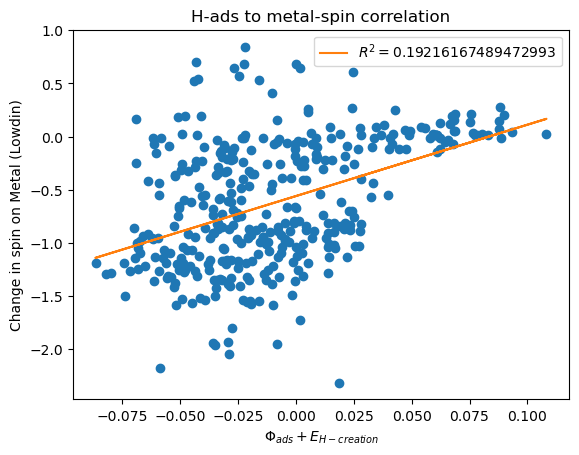

In [8]:
dmags_flat_no0 = []
dGs_flat_no0 = []
tol = 0.01
for i in range(len(dmags_flat)):
    if not abs(dmags_flat[i]) < tol:
        if not np.isnan(dGs_flat[i]):
            dmags_flat_no0.append(dmags_flat[i])
            dGs_flat_no0.append(dGs_flat[i])
dGs_flat_no0 = np.array(dGs_flat_no0)
dmags_flat_no0 = np.array(dmags_flat_no0)
plt.scatter(dGs_flat_no0, dmags_flat_no0)
plt.ylabel(r'Change in spin on Metal (Lowdin)')
plt.xlabel(r'$\Phi_{ads}+E_{H-creation}$')
m, b, r, p, std_err = linregress(dGs_flat_no0, dmags_flat_no0)
plt.plot(dGs_flat_no0, dGs_flat_no0*float(m) + b, label=r"$R^2=$" + str(r**2), color='C1')
plt.title('H-ads to metal-spin correlation')
plt.legend()
plt.savefig(save_dir + 'delta_spin_ads_corr_no0.png')

In [9]:
dGs = []
for i_coord in range(4):
    dGs.append([])
    for i_geom in range(2):
        dGs[-1].append([])
        for i_row in range(3):
            dGs[-1][-1].append([])
            for i_col in range(len(surfs[0])):
                dGs[-1][-1][-1].append([])
                if not ((i_col == 0) and (i_row == 2)):
                    for i_bias in range(3):
                        try:
                            dG = get_dG(i_coord, i_geom, i_row, i_col, i_bias)
                        except:
                            print("No such dir " + get_dir(i_coord, i_geom, i_row, i_col, i_bias, True))
                            dG = 0.0
                        dGs[-1][-1][-1][-1].append(dG)
                else:
                    for i_bias in range(3):
                        dGs[-1][-1][-1][-1].append(np.nan)
                dGs[-1][-1][-1][-1] = np.array(dGs[-1][-1][-1][-1])
            dGs[-1][-1][-1] = np.array(dGs[-1][-1][-1])
        dGs[-1][-1] = np.array(dGs[-1][-1])
    dGs[-1] = np.array(dGs[-1])
dGs = np.array(dGs)
dGs[0][1][1][8] = np.array([np.nan, np.nan, np.nan])

In [22]:
dGs_bb = []
dmags_bb = []
for i_bias in range(len(biases)):
    dGs_bb.append([])
    dmags_bb.append([])
    for i_coord in range(len(coordination)):
        for i_geom in range(2):
            for i_row in range(3):
                for i_col in range(len(surfs[0])):
                    if not ((i_col == 0)) and (i_row == 2):
                        try:
                            dG = get_dG(i_coord, i_geom, i_row, i_col, i_bias)
                            mag0, ox0 = get_tm_info(i_coord, i_geom, i_row, i_col, i_bias, 0)
                            mag1, ox1 = get_tm_info(i_coord, i_geom, i_row, i_col, i_bias, 1)
                            dmag = abs(mag1) - abs(mag0)
                        except:
                            print('hey')
                            dG = np.nan
                            dmag = np.nan
                        dGs_bb[-1].append(dG)
                        dmags_bb[-1].append(dmag)
                    else:
                        dGs_bb[-1].append(np.nan)
                        dmags_bb[-1].append(np.nan)
    dGs_bb[-1] = np.array(dGs_bb[-1])
    dmags_bb[-1] = np.array(dmags_bb[-1])
dGs_bb = np.array(dGs_bb)
dmags_bb = np.array(dmags_bb)

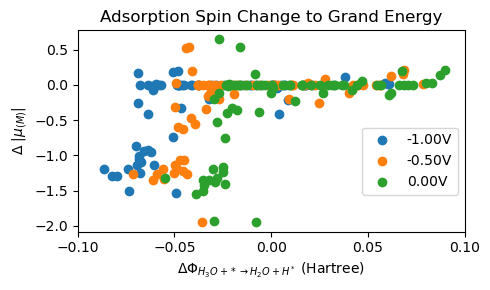

In [51]:
plt.figure(figsize=(5,3))
for i, b in enumerate(biases):
    plt.scatter(dGs_bb[i], dmags_bb[i], label=b)
plt.ylabel(r'$\Delta$ $|\mu_{(M)}|$')
plt.xlabel(r'$\Delta\Phi_{H_3O + * \rightarrow H_2O + H^*}$ (Hartree)')
plt.title('Adsorption Spin Change to Grand Energy')
plt.xticks([-0.1, -0.05, 0.0, 0.05, 0.1])
plt.legend(loc="lower right", bbox_to_anchor=(0.5, 0.15, 0.5, 0.5))
plt.tight_layout()
plt.savefig(save_dir + 'delta_spin_ads_corr2.png')

In [21]:
print(np.nanmean(dGs_flat))

-0.0018842361975851193


In [20]:
print(np.nanmean([np.nanmean(x) for x in dGs_bb]))

-0.01157687345751123


In [24]:
print(len(dmags_flat))

720


In [25]:
print(sum([len(x) for x in dmags_bb]))

720


In [ ]:
oxs = []
mags = []
for i_coord in range(4):
    oxs.append([])
    mags.append([])
    for i_geom in range(2):
        oxs[-1].append([])
        mags[-1].append([])
        for i_row in range(3):
            oxs[-1][-1].append([])
            mags[-1][-1].append([])
            for i_col in range(len(surfs[0])):
                oxs[-1][-1][-1].append([])
                mags[-1][-1][-1].append([])
                if not ((i_col == 0) and (i_row == 2)):
                    for i_bias in range(3):
                        oxs[-1][-1][-1][-1].append([])
                        mags[-1][-1][-1][-1].append([])
                        for i_ads in range(2):
                            mag, ox = get_tm_info(i_coord, i_geom, i_row, i_col, i_bias, i_ads)
                            oxs[-1][-1][-1][-1][-1].append(ox)
                            mags[-1][-1][-1][-1][-1].append(mag)
                else:
                    for i_bias in range(3):
                        oxs[-1][-1][-1][-1].append([])
                        mags[-1][-1][-1][-1].append([])
                        for i_ads in range(2):
                            oxs[-1][-1][-1][-1][-1].append(np.nan)
                            mags[-1][-1][-1][-1][-1].append(np.nan)
                        oxs[-1][-1][-1][-1][-1] = np.array(oxs[-1][-1][-1][-1][-1])
                        mags[-1][-1][-1][-1][-1] = np.array(mags[-1][-1][-1][-1][-1])
                oxs[-1][-1][-1][-1] = np.array(oxs[-1][-1][-1][-1])
                mags[-1][-1][-1][-1] = np.array(mags[-1][-1][-1][-1])
            oxs[-1][-1][-1] = np.array(oxs[-1][-1][-1])
            mags[-1][-1][-1] = np.array(mags[-1][-1][-1])
        oxs[-1][-1] = np.array(oxs[-1][-1])
        mags[-1][-1] = np.array(mags[-1][-1])
    oxs[-1] = np.array(oxs[-1])
    mags[-1] = np.array(mags[-1])
oxs = np.array(oxs)
mags = np.array(mags)
oxs[0][1][1][8][0][1] = np.nan
mags[0][1][1][8][0][1] = np.nan